# **Multiple Linear Regression: Diagnostics**
**Lecture 03**
   
   
<center> 
<img src="https://images.unsplash.com/photo-1579154392128-bf8c7ebee541?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2370&q=80" width=400>
</center>    
    
Photo by <a href="https://unsplash.com/@nci?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">National Cancer Institute</a> on <a href="https://unsplash.com/photos/tV-RX0beDp8?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

In [3]:
# Run this cell before continuing.
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(modelr)
library(tidyverse)
library(palmerpenguins)

penguins_clean <-
    penguins %>%
    drop_na()

options(repr.plot.width = 10, repr.plot.height = 5) 

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::boots

# Last class: Review

## What did we cover:

- Simple Linear Regression (SL):

    - with one binary variable --> models the mean --> equivalent to t-test

<br> 

- Multiple Linear Regression (MLR): 

    - Categorical input variables with 2 or more levels


    - Additive MLR with different type of input variables


    - MLR with interaction terms: interactions between continuous and categorical input variables


    - Additive MLR with any type of input variables

## Review of MLR with interaction

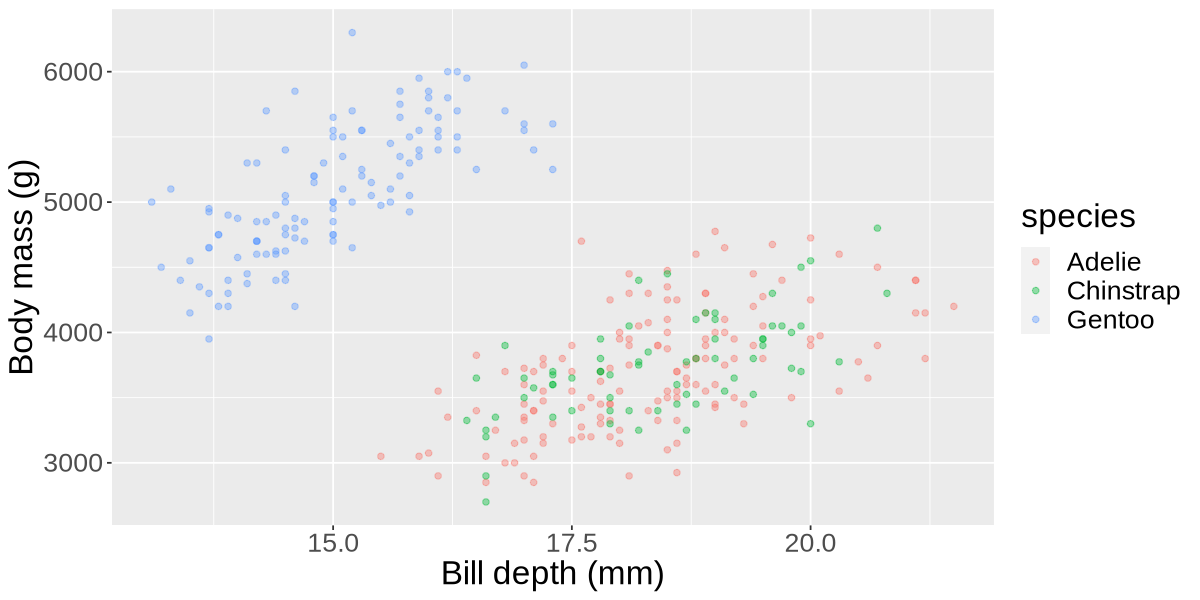

In [4]:
# Let's check if this is correct
penguins_clean %>%
    ggplot() + 
    geom_point(aes(bill_depth_mm, body_mass_g, color = species), alpha = .4) + 
    theme(text = element_text(size = 20)) + 
    xlab("Bill depth (mm)") + 
    ylab("Body mass (g)")


In [5]:
penguins_interactive_model <- lm(body_mass_g ~ species * bill_depth_mm, data = penguins_clean)

summary(penguins_interactive_model)


Call:
lm(formula = body_mass_g ~ species * bill_depth_mm, data = penguins_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-836.31 -255.82  -30.44  229.58 1156.89 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -297.38     441.69  -0.673 0.501242    
speciesChinstrap                 261.16     828.02   0.315 0.752654    
speciesGentoo                   -124.43     663.33  -0.188 0.851314    
bill_depth_mm                    218.21      24.02   9.084  < 2e-16 ***
speciesChinstrap:bill_depth_mm   -13.58      44.91  -0.302 0.762491    
speciesGentoo:bill_depth_mm      149.49      40.76   3.668 0.000286 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 352.7 on 327 degrees of freedom
Multiple R-squared:  0.811,	Adjusted R-squared:  0.8081 
F-statistic: 280.7 on 5 and 327 DF,  p-value: < 2.2e-16



**<font color='darkred'>Interpreptation:</font>**

- Reference level: `Adelie` species.
    - Intercept of the `Adelie` line given by `(intercept)` term: $-297.38$
    - slope for the `Adelie` line: $218.21$

<br>

- `speciesChinstrap`: $261.16$ is the *difference* between intercepts of `Adelie` line and `Chinstrap` line
    - intercept of `Chinstrap` line: $-297.38 + 261.16.21$

<br>

- `speciesGentoo`: $284.52$ is the *difference* between intercepts of `Adelie` line and `Gentoo` line
    - intercept: $-4013.18 + 284.52 = -3728.66$
    
<br> 

- `bill_depth_mm`: $218.21$ slope of the reference line `Adelie`

- `speciesChinstrap:bill_depth_mm`: -13.58 is the *difference* between the **slopes** of `Adelie` line and `Chinstrap` line

- `speciesGentoo:bill_depth_mm`: -149.49 is the *difference* between **slopes** of `Adelie` line and `Gentoo` line

### **A note on interpretation**

#### Additive models

Additive models are more common in practice since they are easier to interpret, in particular when many variables are available.
The reason is because <font color='darkred'> additive models assume that the change of the response per unit change of another variable does not depend on the values of other variables </font>

For example, if we use additive models: 

- the increase in calories burned per addition hour of exercise does not depend on the age of the athlete

- the increase in sale price per additional square foot of a house does not depend on the location of the house

- the increase in mortality per additional percentage of populace poverty does not depend on the percentage of people with private coverage

Note that in some cases, this assumption may not be realistic. Still, you may prefer to simplify the problem. 

<font color='darkred'>In additive models, you interpret each coefficient separately while **"holding all other variables constant"**.</font> And since the model is additive, it doesn't matter at which value the variables are held constant.


#### Interactive models

As we have seen when dealing with interactive models **we cannot ignore the value of the other variable.**

For example, if we are unaware of the values of the dummy variables in the model above, we cannot interpret the model accurately because it's unclear which species is being referred to and what the intercept and slope values are. 

Things get even trickier when we have interaction between two numeric variables.
Consider the model:

$$
\text{body_mass}_i = \beta_0 + \beta_1 \times \text{flipper_length}_i + \beta_2\times\text{bill_depth}_i + \beta_3\times\text{flipper_length}_i\times\text{bill_depth}_i
$$

Note that, now, for each 1 mm increase in `flipper_length`, we expect to observe a change of <font color='darkred'>$\beta_1+\beta_3\times\text{bill_depth}$</font> in `body_mass`. This means that the slope of `flipper_length` depends on the slope of `bill_depth`. This makes the model much harder to interpret.

# **Today's topic: MLR Diagnostics**

- What assumptions are you making when fitting a linear model?

- How do we check the validity of these assumptions?

- What happens if these assumptions are violated?

- Other problems: outliers, multicollinearity, and high-leverage points;

## 1. **Assumptions**

**L.** <font color='blue'>**L**</font>inear relation between response and predictors;

**I.** Errors are <font color='blue'>**I**</font>ndependent; 

**N.** Conditional distribution of the error terms is <font color='blue'>**N**</font>ormal (thus that of the response if errors are iid)

**E.** The variance of the error terms are <font color='blue'>**E**</font>qual


These assumptions are needed at different stages of the analysis (some are *more “needed”* than others).

Note that these are **assumptions** and do not necessarily hold true. We should consider how to check their validity. 


### 1.1 **Assumption 1: Linear Relation**

So far, we have been using a line to model the association between the predictors and the response. Not surprisingly, the relationship should be close to a line for the model to be reliable. If the relationship is highly non-linear, then our model is dubious. 

Two questions immediately arise:

1. Diagnosis: how do we detect non-linearity? 

2. What can we do about it? 

`geom_smooth()` using formula = 'y ~ x'


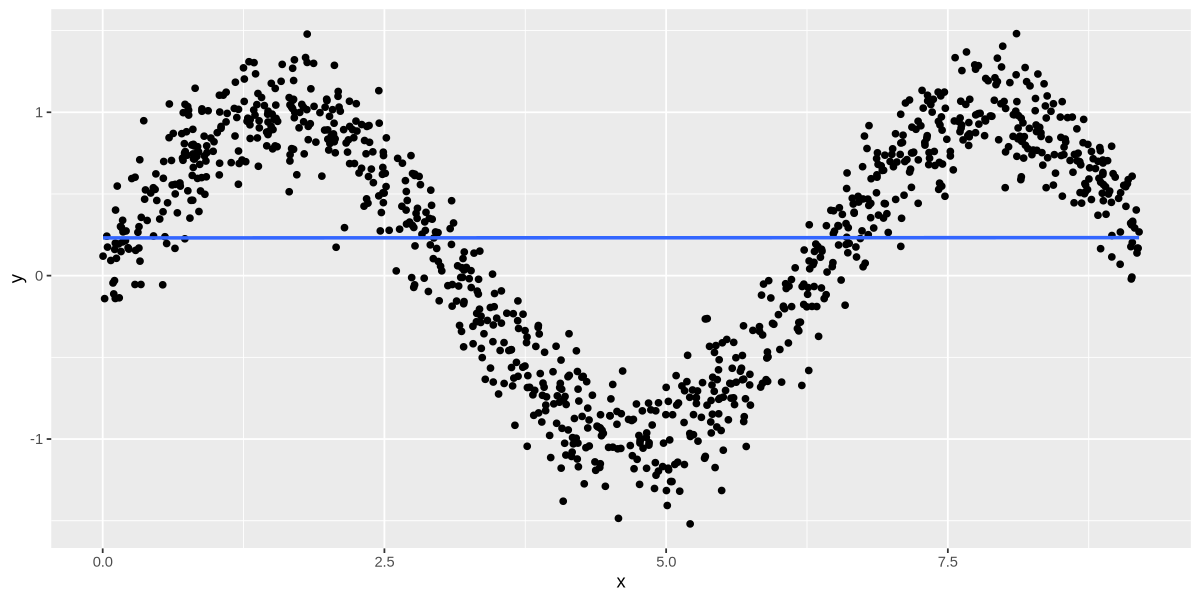

In [6]:
# Very dubious model
# If interpret this linear model, you'll be in trouble

tibble(x = runif(1000, 0, 9.2), 
       y = sin(x) + rnorm(1000, 0, 0.2)) %>% 
    ggplot(aes(x,y)) + 
    geom_point() + 
    geom_smooth(method = lm, se = FALSE)

#### 1.1.1 Diagnosis

Keep in mind that residuals hold all the data that the model does not account for. We can examine the residuals to understand more about our model. One useful way to identify any (non-linear) patterns in the data that the model doesn't capture is by plotting the fitted values against the residuals.

In [7]:
penguins_lm <- lm(body_mass_g ~ flipper_length_mm, data = penguins_clean)

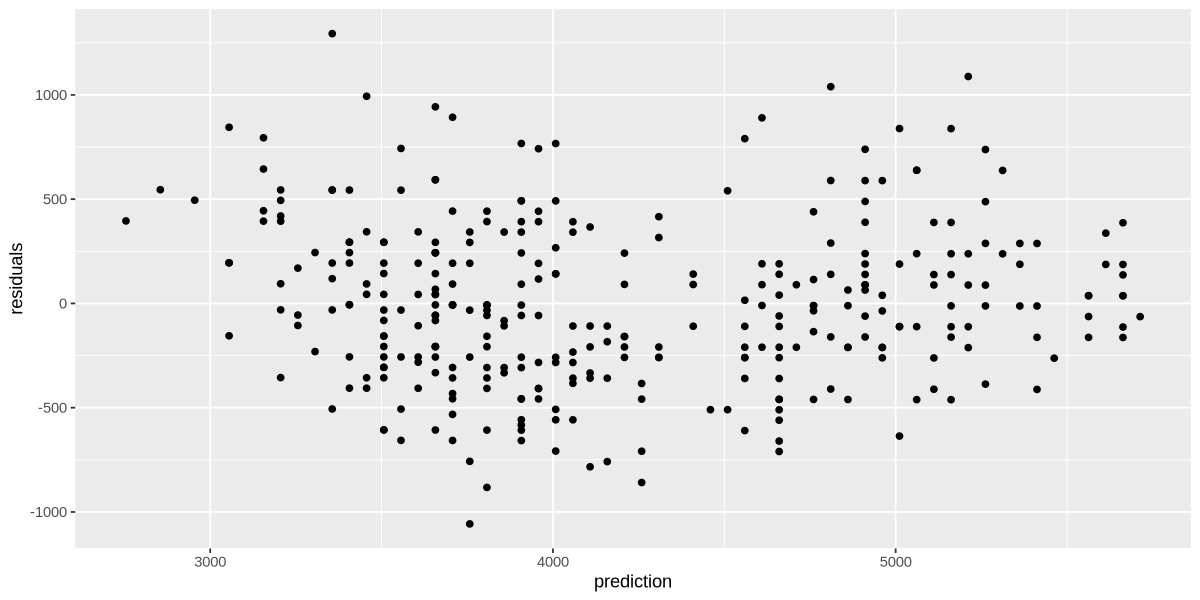

In [8]:
penguins_clean %>%
    add_predictions(penguins_lm, var = 'prediction') %>%
    mutate(residuals = body_mass_g - prediction) %>%
    ggplot(aes(prediction, residuals)) + 
    geom_point() #+ 
    #geom_smooth(se = FALSE) # Adding a smooth function can help visualize. 

Another example, from ISL: 

<div>
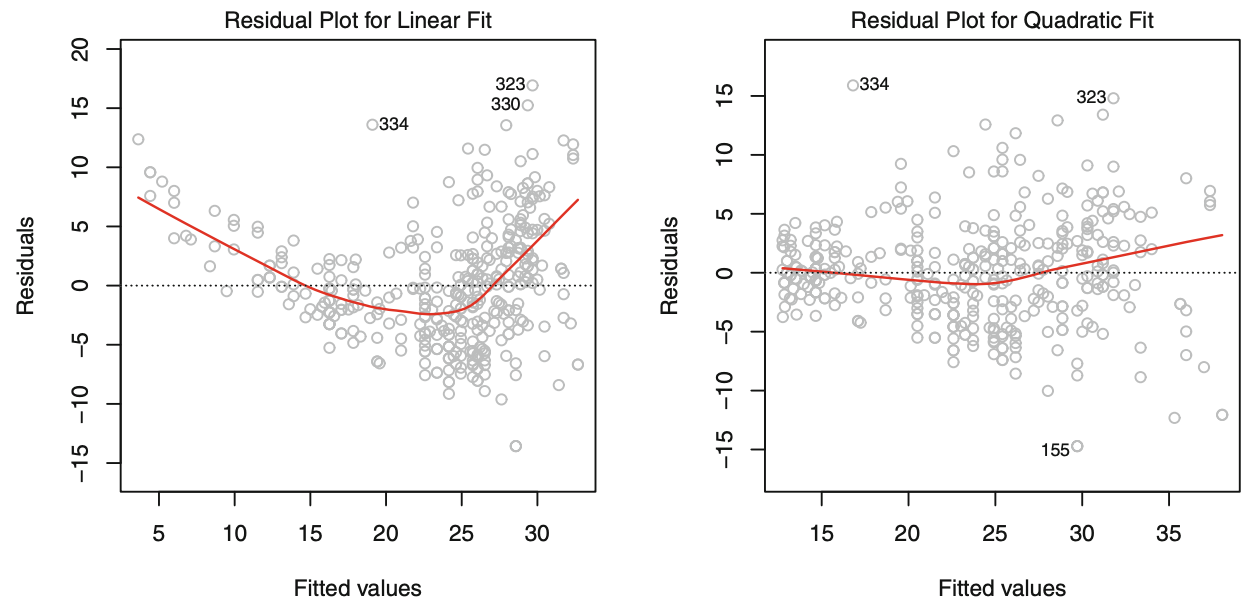
</div>


#### 1.1.2 **The misleading word `Linear`**

Although we have only been fitting lines so far, the least square methods allow you to have any covariate in the model. For example, for a model 
$$
Y_i = \beta_0 + \beta_1X_{1i} + \beta_1X_{2i} + \varepsilon_i
$$

The covariates $X_{1}$ and $X_{2}$ can be anything, such as, $X_{1} = \text{Price}$ and $X_{2} = \text{Price}^2$, result in a model  

$$
Y_i = \beta_0 + \beta_1\times\text{Price}_{1i} + \beta_1\times
\text{Price}_{2i}^2
 + \varepsilon_i
$$

The least square method will work precisely the same way. 

<font color='darkred'>Just be careful, as this will affect the interpretation of the model.</font>

In [9]:
# Start with order two coefficient and then order 3.
penguins_lm_non_linear <- lm(body_mass_g ~ flipper_length_mm + I(flipper_length_mm^2) + I(flipper_length_mm^3), data = penguins_clean)

In [10]:
summary(penguins_lm_non_linear)


Call:
lm(formula = body_mass_g ~ flipper_length_mm + I(flipper_length_mm^2) + 
    I(flipper_length_mm^3), data = penguins_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-973.10 -242.64  -26.68  222.29 1191.82 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             1.795e+05  5.553e+04   3.232  0.00135 **
flipper_length_mm      -2.591e+03  8.234e+02  -3.147  0.00180 **
I(flipper_length_mm^2)  1.249e+01  4.060e+00   3.076  0.00227 **
I(flipper_length_mm^3) -1.960e-02  6.659e-03  -2.943  0.00348 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 376.1 on 329 degrees of freedom
Multiple R-squared:  0.7838,	Adjusted R-squared:  0.7818 
F-statistic: 397.5 on 3 and 329 DF,  p-value: < 2.2e-16


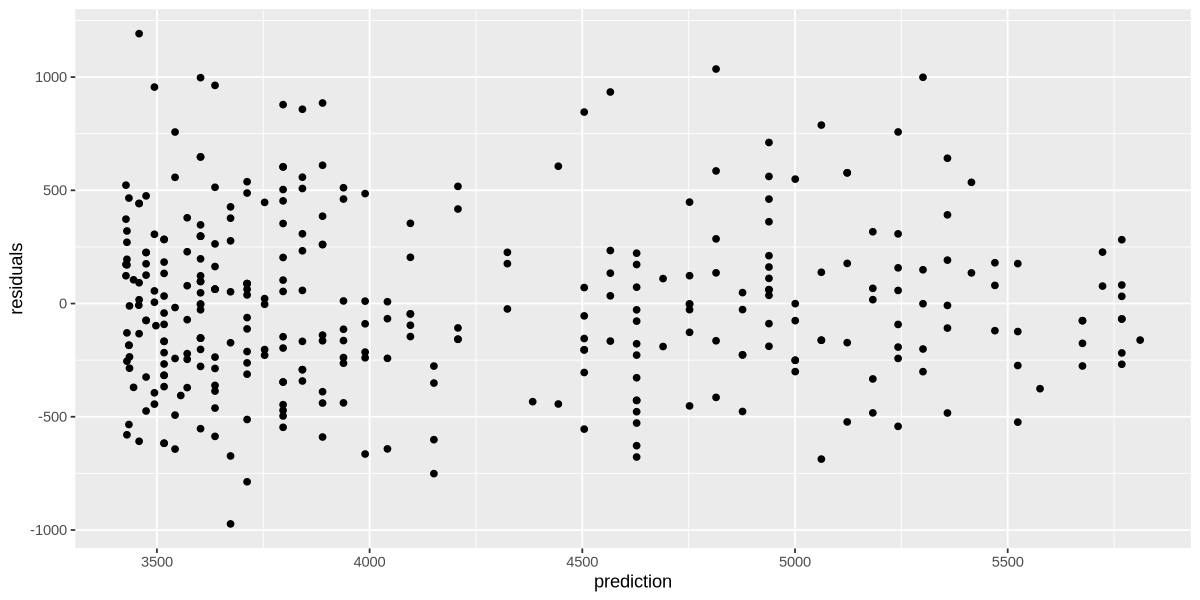

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5) 

penguins_clean %>%
    add_predictions(penguins_lm_non_linear, var = 'prediction') %>%
    mutate(residuals = body_mass_g - prediction) %>%
    ggplot(aes(prediction, residuals)) + 
    geom_point() #+ 
    #geom_smooth(se = FALSE) # Adding a smooth function can help visualize. 

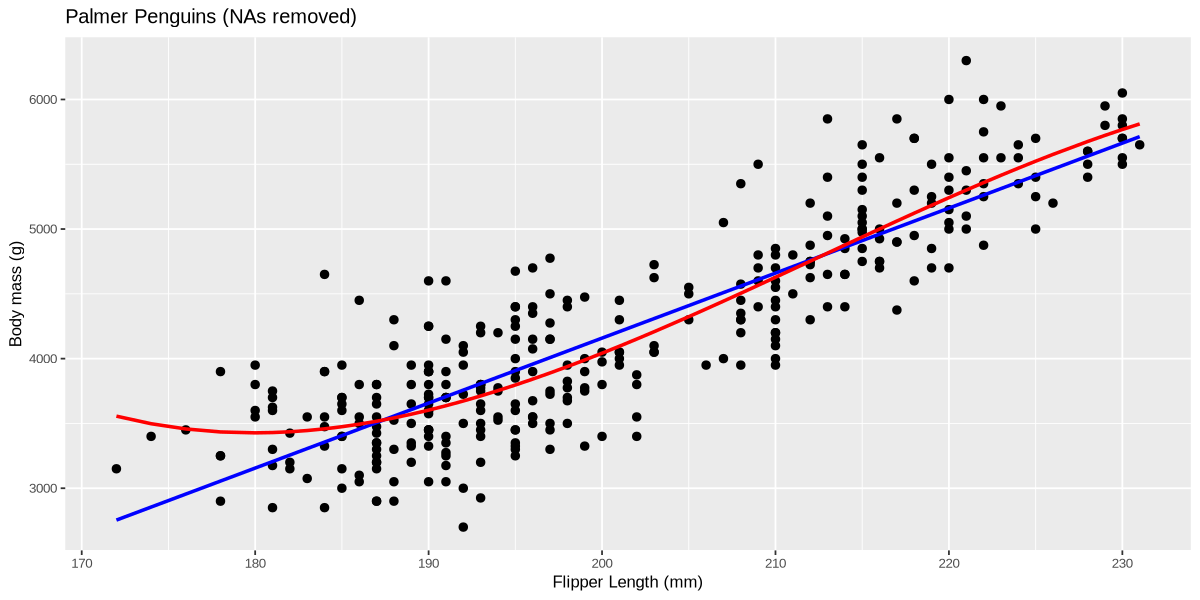

In [12]:
# Adjust these numbers so the plot looks good on your desktop.
options(repr.plot.width = 10, repr.plot.height = 5) 

penguins_clean %>% 
  add_predictions(penguins_lm, var = 'slr_pred') %>%
  add_predictions(penguins_lm_non_linear, var = 'non_linear_pred') %>%
  ggplot(aes(flipper_length_mm, body_mass_g)) + 
  geom_point(size = 2) + 
  geom_line(aes(y = slr_pred), color = 'blue', lwd = 1) + 
  geom_line(aes(y = non_linear_pred), color = 'red', lwd = 1) + 
  ggtitle("Palmer Penguins (NAs removed)") + 
  xlab("Flipper Length (mm)") + 
  ylab("Body mass (g)") + 
  theme(text = element_text(size = 10))

#### 1.1.3 **What can we do about non-linearity**

We can include transformations of the covariates and interaction terms between covariates to make the model more "powerful". But again, remember that this
<font color='darkred'>this will affect the interpretation of the model.</font>

### 1.2 **Assumption 2: Independence**

We assume we have a random sample. The independence of the errors can usually be assessed from the study's design. 

For example, we can safely assume that the measurements from a penguin do not affect the measurements from a different penguin. 

Commonly data that violate independence:

- temporal data (data collected over time)
- multiple measurements of the same subject

#### 1.2.1 Diagnosis

This is tricky. The correlation can be very different in different problems. 
However, a residual plot might be helpful. There are also statistical tests for some types of residual correlation (e.g., Durbin-Watson test). However, these tests are outside the scope of this course.

<div>
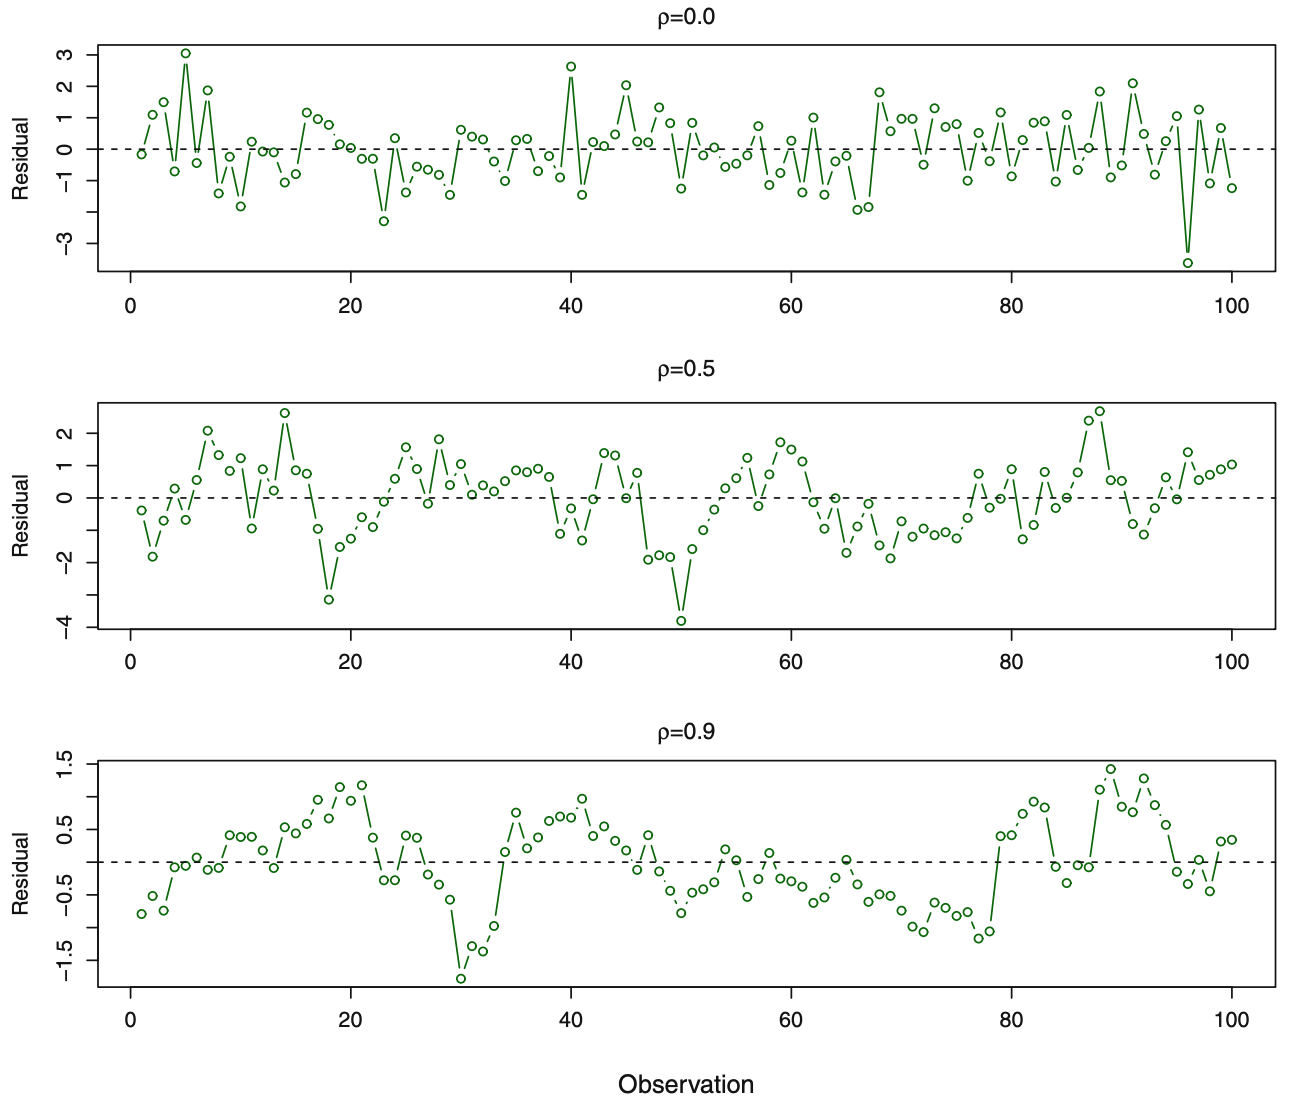
</div>

#### 1.2.2 **Violation of independence**

The biggest issue here is that the std. errors of our estimators $\hat{\beta}$s are biased; therefore, the confidence intervals and hypothesis tests we learned are invalid. 

#### 1.2.3 **What can we do about**

Some variations of Least Squares have been proposed to deal with this problem, but they have some limitations. 

There are also other methods to deal with correlated observations (e.g., times series analysis, longitudinal data analysis).
However, these are whole disciplines and require a course on their own. 

### 1.3 **Assumption 3: Constant Variance of the Errors (homoscedasticity)**

Remember from the model equation:

$$
Y_i = \beta_0 + \beta_1X_{i} + \varepsilon_i
$$

where $\varepsilon_i$  are random components for sample $i$. 

One of the assumptions is that each one of these $\varepsilon_i$ have the same standard deviation. 


#### 1.3.1 Diagnosis

Once again, the fitted vs residuals plot is helpful in detecting heteroscedasticity. 

<div>
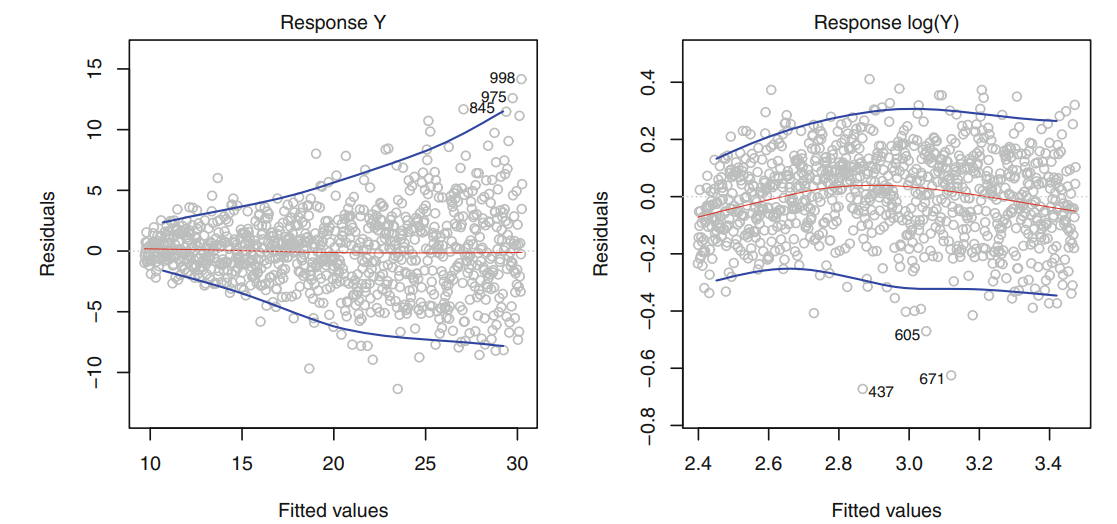
</div>

#### 1.3.2 **Violation of homoscedasticity**

Once again, this affects the standard error of our estimators. There will be better estimators (with lower std. errors) than OLS.
Consequently, the Confidence Intervals and Hypothesis Testing are no longer appropriate. 

#### 1.3.3 **What can we do about**

Variance stabilizing transformation of the response (e.g., $\sqrt{Y}$, or $\log(Y)$).

Another possibility is to use *Weighted Least Square* when we have an idea of how the variance changes with the response (out of the scope of this course).

### 1.5 **Assumption 4: Normality**

The violation of this assumption is (arguably)less severe than the others.

- The errors do not necessarily need to be Normal to have valid inference results
    - If the sample size (n) is large, the CLT gives approximations for the sampling distribution
    - Bootstrapping can also be used to approximate the sampling distribution

<br>

However, if the conditional distribution of the errors is Normal, it can be proved that the conditional expectation of the response is linear! So our model is good!!
- Q-Q plots and histograms of the residuals can be used to diagnose this problem
- Variables transformations can be used as possible “remedies”
- Most importantly, we should think if we can rely on the CLT or if bootstrapping is preferred


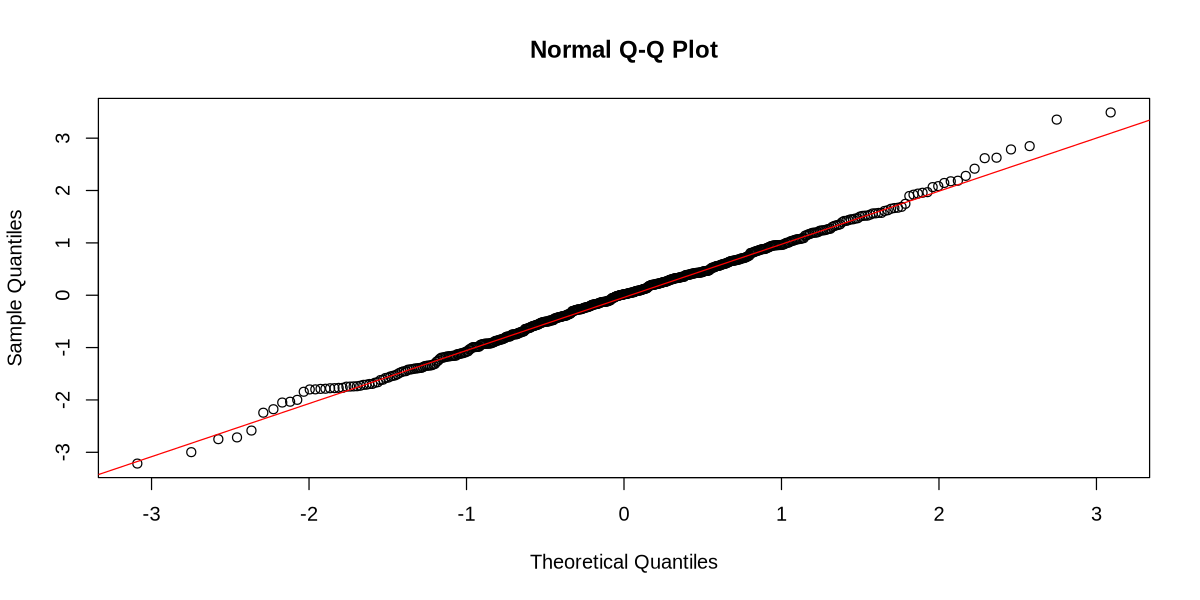

In [40]:
sample_from_normal <- rnorm(500)
qqnorm(sample_from_normal)
qqline(sample_from_normal, col = 'red')

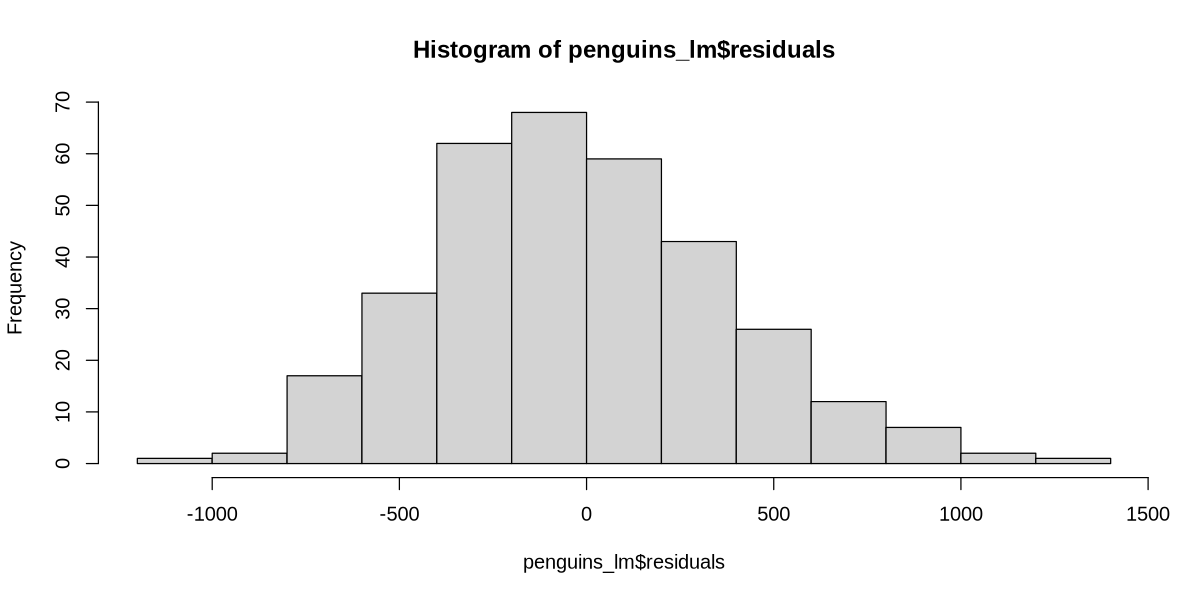

In [43]:
hist(penguins_lm$residuals)

### 1.6 **R plots everything for you**

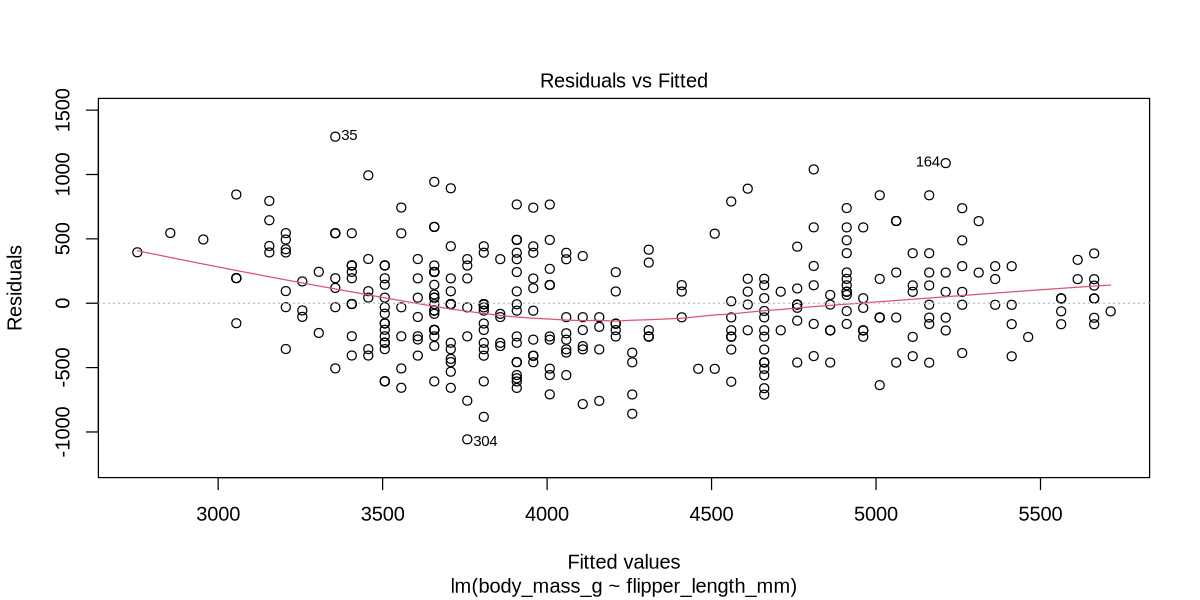

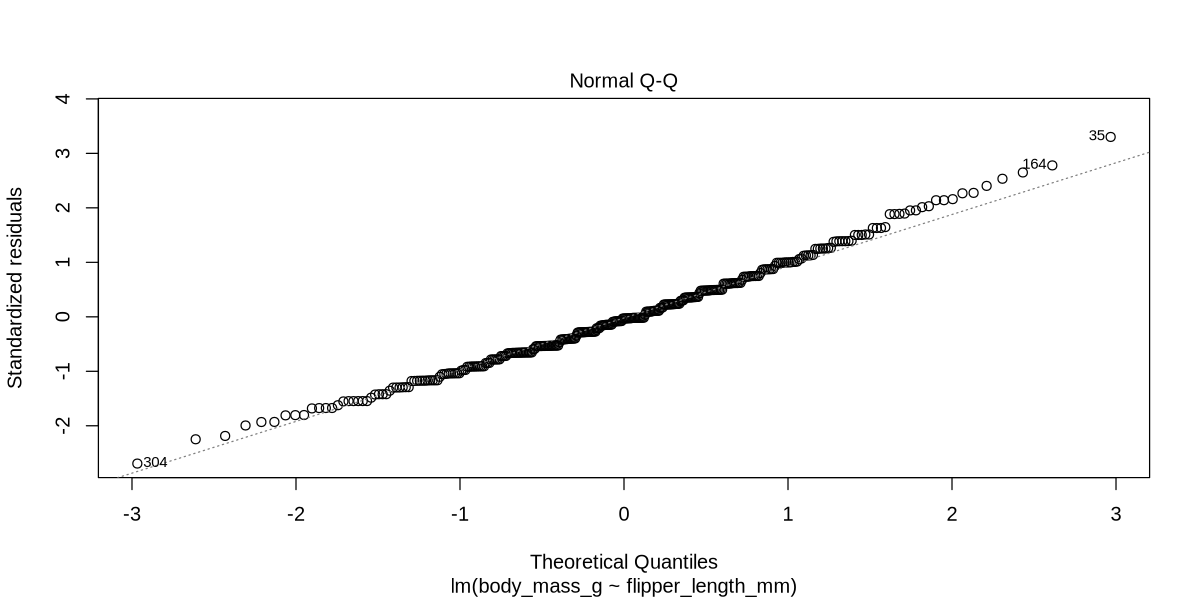

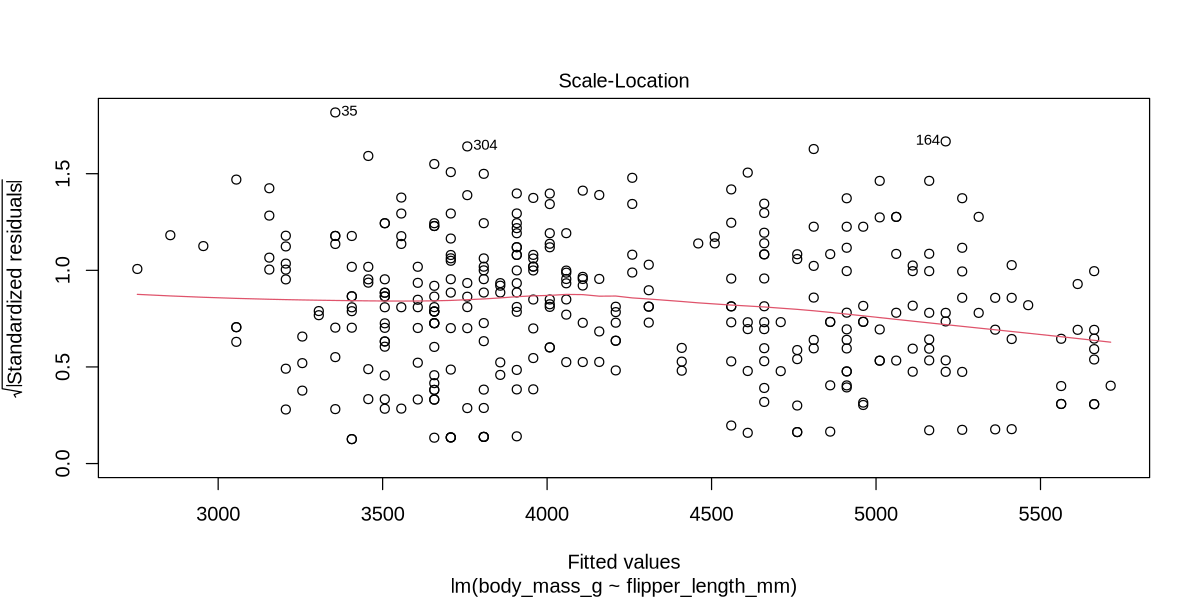

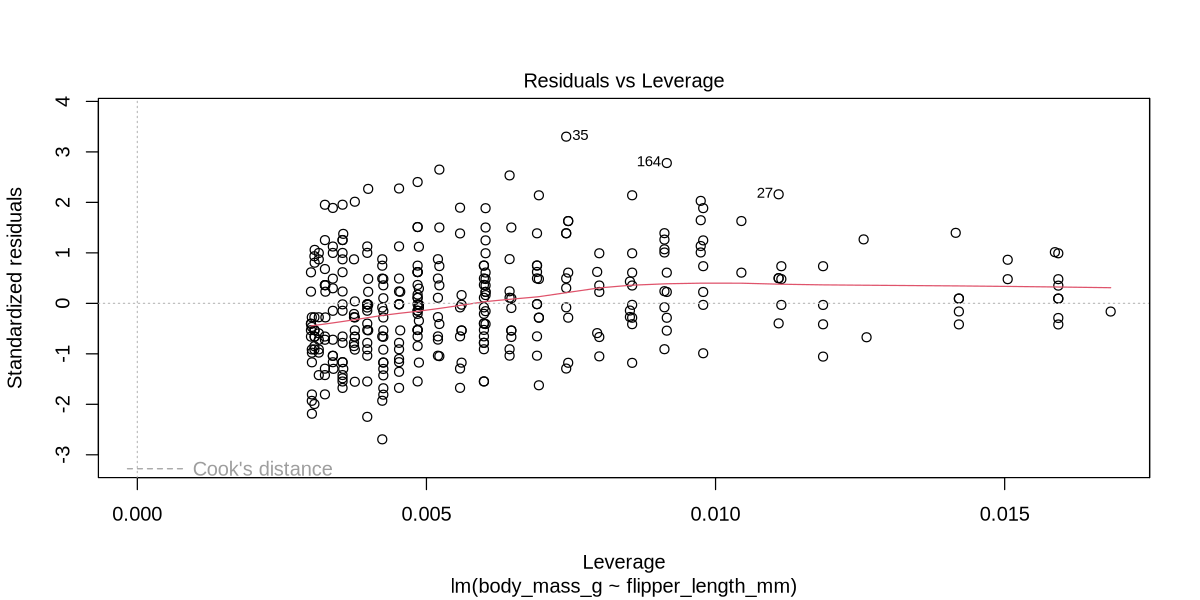

In [44]:
plot(penguins_lm)

## 2. Multicollinearity

Multicollinearity occurs when there is a strong association between two or more covariates. These covariates bring similar information to the model, and we have trouble isolating their effects. 

For example, consider the following (drastic) model: 

$$
\text{body_mass_g}_i = \beta_0 + \beta_1\times\text{flipper_length_mm} + \beta_2\times\text{flipper_length_cm} + \varepsilon_i
$$

In other words, we are using `flipper_length` in millimeters and in centimeters to explain `body_mass`.

In [5]:
model_example <- lm(body_mass_g ~ flipper_length_mm + flipper_length_cm, data = penguins_clean %>% mutate(flipper_length_cm = flipper_length_mm / 10))
summary(model_example)


Call:
lm(formula = body_mass_g ~ flipper_length_mm + flipper_length_cm, 
    data = penguins_clean %>% mutate(flipper_length_cm = flipper_length_mm/10))

Residuals:
     Min       1Q   Median       3Q      Max 
-1057.33  -259.79   -12.24   242.97  1293.89 

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5872.09     310.29  -18.93   <2e-16 ***
flipper_length_mm    50.15       1.54   32.56   <2e-16 ***
flipper_length_cm       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 393.3 on 331 degrees of freedom
Multiple R-squared:  0.7621,	Adjusted R-squared:  0.7614 
F-statistic:  1060 on 1 and 331 DF,  p-value: < 2.2e-16


In this drastic case, R could not even estimate the coefficients since the variable `flipper_length_mm` is essentially the same as `flipper_length_cm`; one is just a linear transformation of the other. 

The consequence is that R cannot separate the effect of these variables (of course, since they are the same). 

Now, let's delve into the technical aspect that caused R to struggle. Remember, in the least square, our goal is to minimize the Square Sum of Residuals (SSR). The SSR in R's output for our `model_example` is:

In [41]:
sum(model_example$residuals**2)

[1] 51211963

This model corresponds to: 


$$
\text{body_mass_g}_i = -5872.09 + 50.15\times\text{flipper_length_mm}
$$

But many different models (in fact, infinite) that would give us exactly the same SSR, for example: 

- Model Example 2:
$$\text{body_mass_g}_i = -5872.09 + 25.0766\times\text{flipper_length_mm} + 250.7663\times\text{flipper_length_cm}$$

- Model Example 3: 
$$\text{body_mass_g}_i = -5872.09 + 12.5383\times\text{flipper_length_mm} + 376.1495\times\text{flipper_length_cm}$$

- Model Example 4: 
$$\text{body_mass_g}_i = -5872.09 + 501.5327\times\text{flipper_length_cm}$$

Let's verify!

In [72]:
penguins_clean %>% 
    mutate(flipper_length_cm = flipper_length_mm / 10) %>%
    
    mutate(pred_model_example_2 = beta0 + (beta1/2) * flipper_length_mm + 10*(beta1/2)*flipper_length_cm,
           pred_model_example_3 = beta0 + (beta1/4) * flipper_length_mm + 10*(3*beta1/4)*flipper_length_cm,
           pred_model_example_4 = beta0 + 10*beta1*flipper_length_cm,
           pred_model_example_2 = beta0 + 25.0766 * flipper_length_mm + 250.7663*flipper_length_cm,
           pred_model_example_3 = beta0 + 12.5383* flipper_length_mm + 376.1495*flipper_length_cm,
           pred_model_example_4 = beta0 + 501.5327*flipper_length_cm,
           red_model_example_2 = body_mass_g - pred_model_example_2,       
           red_model_example_3 = body_mass_g - pred_model_example_3,
           red_model_example_4 = body_mass_g - pred_model_example_4) %>%
    summarise(SSR_model_example_2 = sum(red_model_example_2**2),
              SSR_model_example_3 = sum(red_model_example_3**2),
              SSR_model_example_4 = sum(red_model_example_3**2))

SSR_model_example_2 SSR_model_example_3 SSR_model_example_4
1 51211963            51211963            51211963

Note that since `flipper_length_mm` and `flipper_length_cm`, we can shift "weight" from one variable to another. Note how Model Example 2 reduces $\beta_1$ in half compared to Model Example. Then, Model Example 3 reduces $\beta_1$ in half again compared to Model Example 2. And Model Example 4 shifts the entire focus to `flipper_length_cm`. All these models would be equivalent. 

Multicollinearity in practice doesn't happen this way, though. We don't usually observe perfect multicollinearity like this. Also, the association doesn't need to be between two variables alone (a common mistake of students). 

Think of multicollinearity as if we regress one of the covariates using the other covariate as a response and obtain a very good model. 

### 2.1 **Consequences of multicollinearity**

Multicollinearity inflates the standard errors of our estimates, making our confidence intervals wider than necessary and making it harder to reject the null-hypothesis of the coefficients. 

### 2.2 **Diagnosis**

There are different ways to check for multicollinearity. 

A very useful way is to check the pairwise correlation between all the covariates. If one of the covariates is highly correlated with another, you should pay attention. However, **this is not enough**, as multicollinearity can happen when considering more than two covariates. 

Another useful way is to use the VIF. See Section 3.3 of ISL. 
The VIF checks the increase in the standard error of the coefficients when fitted alone compared to when fitted with all other variables. 

The book suggests a VIF higher than 5 or 10 suggests multicollinearity might be problematic. **This is a guideline**!!

### 2.3 **What can we do about**

The most straightforward approach is to drop the collinear variable. 

Another possibility is to combine collinear variables. This might affect the interpretation of the model depending on how the aggregation is done.

### 2.4 **Example**

Let's fit our penguins dataset using all the variables except year (which is the same for all rows). 

In [75]:
cor(penguins_clean %>% select(flipper_length_mm, bill_length_mm, bill_depth_mm))

flipper_length_mm bill_length_mm bill_depth_mm
flipper_length_mm  1.0000000         0.6530956     -0.5777917   
bill_length_mm     0.6530956         1.0000000     -0.2286256   
bill_depth_mm     -0.5777917        -0.2286256      1.0000000

As we can see what have somewhat high correlation. So we should stay alert for multicollinearity. 

In [86]:
penguins_lm_large <- lm(body_mass_g ~ . - year, data = penguins_clean)    
summary(penguins_lm_large)


Call:
lm(formula = body_mass_g ~ . - year, data = penguins_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-779.20 -167.35   -3.16  179.37  914.27 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1500.029    575.822  -2.605 0.009610 ** 
speciesChinstrap   -260.306     88.551  -2.940 0.003522 ** 
speciesGentoo       987.761    137.238   7.197 4.30e-12 ***
islandDream         -13.103     58.541  -0.224 0.823032    
islandTorgersen     -48.064     60.922  -0.789 0.430722    
bill_length_mm       18.189      7.136   2.549 0.011270 *  
bill_depth_mm        67.575     19.821   3.409 0.000734 ***
flipper_length_mm    16.239      2.939   5.524 6.80e-08 ***
sexmale             387.224     48.138   8.044 1.66e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 287.9 on 324 degrees of freedom
Multiple R-squared:  0.8752,	Adjusted R-squared:  0.8721 
F-statistic: 284.1 on 8 and 324 DF,  p-va

Let's take a look on the VIF using `car::vif` function.

In [87]:
vif(penguins_lm_large)

GVIF      Df GVIF^(1/(2*Df))
species           63.523199 2  2.823144       
island             3.731695 2  1.389878       
bill_length_mm     6.099673 1  2.469752       
bill_depth_mm      6.101621 1  2.470146       
flipper_length_mm  6.797579 1  2.607217       
sex                2.326898 1  1.525417

This function actually returns the generalized VIF as well. The generalized VIF (right column) is preferred because categorical covariates are affected by the number of categories they have. So, GVIF, in the right column, accounts for that. Note that for all rows with $\text{Df} =1$, the right column is just the squared root of the left column. So, you can either take the square of the right column and compare it with the guideline of 5 or 10 or compare the right column against $\sqrt{5}$ or $\sqrt{10}$.

As you can see, species has the highest VIF here higher than $\sqrt{5} = 2.23$ but still less than $\sqrt{10}=3.16$. Let's try removing it from the model. 

In [88]:
penguins_lm_large_2 <- lm(body_mass_g ~ . - species - year, data = penguins_clean)    
summary(penguins_lm_large_2)


Call:
lm(formula = body_mass_g ~ . - species - year, data = penguins_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-835.45 -217.10    1.16  227.56 1064.95 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2115.616    604.551  -3.499 0.000531 ***
islandDream        -313.465     54.855  -5.714 2.48e-08 ***
islandTorgersen    -223.512     65.406  -3.417 0.000713 ***
bill_length_mm        6.052      4.969   1.218 0.224143    
bill_depth_mm       -50.338     16.236  -3.100 0.002101 ** 
flipper_length_mm    33.939      2.505  13.550  < 2e-16 ***
sexmale             489.929     50.224   9.755  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 325.8 on 326 degrees of freedom
Multiple R-squared:  0.8393,	Adjusted R-squared:  0.8363 
F-statistic: 283.8 on 6 and 326 DF,  p-value: < 2.2e-16


As you can see, the fit of the coefficients related to `island` has improved considerably. Maybe `species` is associated with `island`? 

In [84]:
penguins_clean %>%
    group_by(island,species) %>%
    count()

island    species   n  
1 Biscoe    Adelie     44
2 Biscoe    Gentoo    119
3 Dream     Adelie     55
4 Dream     Chinstrap  68
5 Torgersen Adelie     47

As you can see, `Chinstrap` is only present on `Dream` island, only `Adelie` is on `Torgersen` island, and `Gentoo` is only on the `Biscoe` island. So, it looks like `species` and `island` are related after all. Let's take a look at the VIF after we removed species.  

In [89]:
vif(penguins_lm_large_2)

GVIF     Df GVIF^(1/(2*Df))
island            2.412912 2  1.246337       
bill_length_mm    2.310218 1  1.519940       
bill_depth_mm     3.198249 1  1.788365       
flipper_length_mm 3.855613 1  1.963572       
sex               1.978756 1  1.406683

Wow, everything looks ok now! But wait, I'm concerned about something. Observe that the coefficient related to the `bill_depth` flipped sign when we removed species. Take another look:

In [91]:
penguins_lm_large


Call:
lm(formula = body_mass_g ~ . - year, data = penguins_clean)

Coefficients:
      (Intercept)   speciesChinstrap      speciesGentoo        islandDream  
         -1500.03            -260.31             987.76             -13.10  
  islandTorgersen     bill_length_mm      bill_depth_mm  flipper_length_mm  
           -48.06              18.19              67.58              16.24  
          sexmale  
           387.22  


In [90]:
penguins_lm_large_2


Call:
lm(formula = body_mass_g ~ . - species - year, data = penguins_clean)

Coefficients:
      (Intercept)        islandDream    islandTorgersen     bill_length_mm  
        -2115.616           -313.465           -223.512              6.052  
    bill_depth_mm  flipper_length_mm            sexmale  
          -50.338             33.939            489.929  


We might have a case of Simpson's paradox here. I don't like this. So, let's try to remove the `island` instead and see what happens. 

In [92]:
penguins_lm_large_3 <- lm(body_mass_g ~ . - island - year, data = penguins_clean)    
summary(penguins_lm_large_3)


Call:
lm(formula = body_mass_g ~ . - island - year, data = penguins_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-779.65 -173.18   -9.05  186.61  914.11 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1460.995    571.308  -2.557 0.011002 *  
speciesChinstrap   -251.477     81.079  -3.102 0.002093 ** 
speciesGentoo      1014.627    129.561   7.831 6.85e-14 ***
bill_length_mm       18.204      7.106   2.562 0.010864 *  
bill_depth_mm        67.218     19.742   3.405 0.000745 ***
flipper_length_mm    15.950      2.910   5.482 8.44e-08 ***
sexmale             389.892     47.848   8.148 7.97e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 287.3 on 326 degrees of freedom
Multiple R-squared:  0.875,	Adjusted R-squared:  0.8727 
F-statistic: 380.2 on 6 and 326 DF,  p-value: < 2.2e-16


All the coefficients are significant at 5%. Also, the coefficients seems more aligned with of the full model. 

In [94]:
vif(penguins_lm_large_3)

GVIF      Df GVIF^(1/(2*Df))
species           41.074074 2  2.531582       
bill_length_mm     6.072898 1  2.464325       
bill_depth_mm      6.077457 1  2.465250       
flipper_length_mm  6.687361 1  2.585993       
sex                2.308318 1  1.519315

The VIF is not as good. But we don't seem to be having issues here. 

Between removing `species` vs `island`, considering the discussion above, I stick with removing `island`. 

What about you?

